In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
sample_json_df = pd.read_json('/Users/lacivert/2014_2017_5yr_7yr_10yr.json')

In [3]:
#assign DataFrame
df = pd.DataFrame(sample_json_df)

In [4]:
#list column names
list(df.columns.values)

['10 yr', '5 yr', '7 yr']

In [5]:
ten_year, five_year, seven_year  = df.loc[:,'10 yr'], df.loc[:,'5 yr'], df.loc[:,'7 yr']

In [6]:
import math
import warnings

from IPython.display import display
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [15]:
df.head()

,10 yr,5 yr,7 yr
0,2.450,1.940,2.260
1,2.460,1.940,2.260
2,2.370,1.860,2.180
3,2.420,1.920,2.230
4,2.380,1.890,2.180


In [17]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df['10 yr'].values.reshape(-1, 1)
X = df[['5 yr','7 yr']]
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[-0.91423442  1.90476348]]

Intercept: 
 [-0.05001133]

R-squared:
0.992972288336076


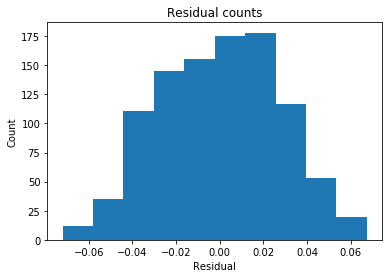

In [21]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = df['10 yr']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

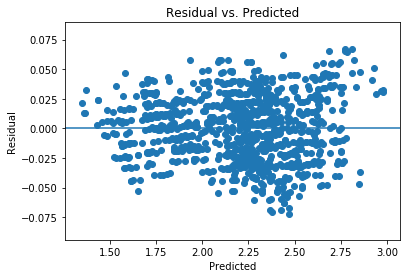

In [22]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [23]:
correlation_matrix = X.corr()
display(correlation_matrix)

,5 yr,7 yr
5 yr,1.000,0.918
7 yr,0.918,1.000
